**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.

In [84]:
from __future__ import print_function, division

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import random
import thinkstats2
import thinkplot

In [58]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
     actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

In [81]:
def EstimateL(lam = 2, n=10, iters=1000):
    """Sampling distribution of L as an estimator of exponential parameter.

    lam: parameter of an exponential distribution
    n: sample size
    m: number of iterations
    """
    
    ls = []
    for _ in range(iters):
        xs = np.random.exponential(1/lam, n)
        L = 1 / np.mean(xs)
        ls.append(L)

    return ls


10 sample
standard error  0.7172790671139467
confidence interval (1.31600685430603, 3.447490242721178)
500 sample
standard error  0.08901736602965542
confidence interval (1.8690492988736367, 2.1531253069587213)
1000 sample
standard error  0.06515850701284161
confidence interval (1.8929045975427639, 2.1105813409550995)


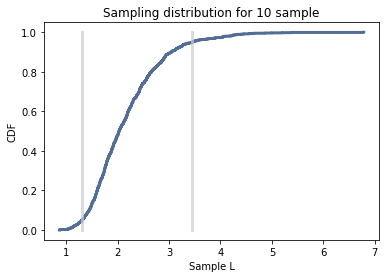

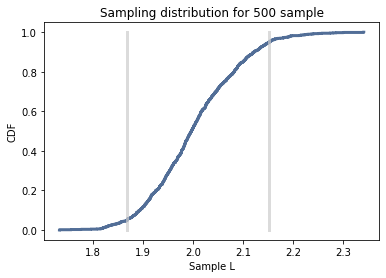

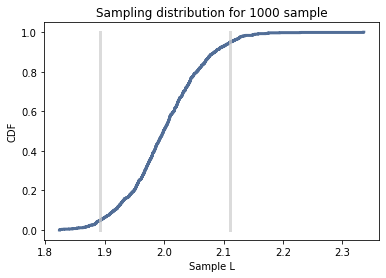

In [97]:

def VertLine(x, y=1):
    """define vertical lines
    """
    thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)
    
#repeating for i equal numre of samples   
for i in [10,500,1000]:
    
    ls= EstimateL(lam = 2, n=i, iters=1000)
        
    # calculating the sampling distribution L CDF
    cdf = thinkstats2.Cdf(ls)

    # calculating and printing RMSE and  cenfidence interval
    print(i,'sample')
    print('standard error ', RMSE(ls,2))
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)

    #ploting the distribution
    plt.subplots(1)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='Sample L',
                 ylabel='CDF',
                 title='Sampling distribution for ' + str(i) + ' sample')
    VertLine(ci[0])
    VertLine(ci[1])
           




As sample size increases, standard error and the width of
the CI decrease:
All three confidence intervals contain the actual value, 2.